# Introduction to PyTorch 简介

请观看下面或[YouTube](https://www.youtube.com/watch?v=IC0_FRiX-sw)上的视频。

## PyTorch Tensors PyTorch 张量

首先，我们将导入`pytorch`。

In [1]:
import torch

让我们看看一些基本的张量操作。首先，介绍几种创建张量的方法：

In [2]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


上面，我们创建了一个用`0`填充的 5x3 矩阵，并查询其数据类型，发现`0`是 32 位浮点数，这是 PyTorch 默认的。

如果您想要整数怎么办？您始终可以覆盖默认值：

In [3]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


可以看到，当我们更改默认值时，张量会在打印时有用地报告这一点。

随机初始化学习权重是很常见的，通常使用 PRNG 的特定种子来实现结果的可重复性：

In [4]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3) # repeats values of r1 because of re-seed

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


PyTorch 张量直观地执行算术运算。相似形状的张量可以相加、相乘等。标量的运算分布在张量上：

In [5]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos       # addition allowed because shapes are similar
print(threes)              # tensors are added element-wise
print(threes.shape)        # this has the same dimensions as input tensors

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# uncomment this line to get a runtime error
# r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


以下是可用数学运算的一小部分示例：

In [6]:
r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[ 0.9956, -0.2232],
        [ 0.3858, -0.6593]])

Absolute value of r:
tensor([[0.9956, 0.2232],
        [0.3858, 0.6593]])

Inverse sine of r:
tensor([[ 1.4775, -0.2251],
        [ 0.3961, -0.7199]])

Determinant of r:
tensor(-0.5703)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.8353, -0.5497],
        [-0.5497,  0.8353]]),
S=tensor([1.1793, 0.4836]),
V=tensor([[-0.8851, -0.4654],
        [ 0.4654, -0.8851]]))

Average and standard deviation of r:
(tensor(0.7217), tensor(0.1247))

Maximum value of r:
tensor(0.9956)


关于 PyTorch 张量的强大功能还有很多需要了解，包括如何将它们设置为在 GPU 上进行并行计算 - 我们将在另一个视频中更深入地介绍。

## PyTorch Models PyTorch 模型

我们来谈谈如何在 PyTorch 中表示模型

In [7]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function

![图：LeNet-5](./assets/mnist.png)

上图是 `LeNet-5` 的图，它是最早的卷积神经网络之一，也是深度学习爆炸式增长的驱动因素之一。它旨在读取手写数字的小图像（MNIST 数据集），并正确分类图像中表示的数字。

以下是其工作原理的精简版本：

- C1 层是一个卷积层，这意味着它会扫描输入图像以查找在训练期间学到的特征。它输出一张地图，显示它在图像中看到的每个学习特征的位置。该“激活图”在 S2 层中进行下采样。
- C3 层是另一个卷积层，这次扫描 C1 的激活图以查找特征组合。它还提供了一个描述这些特征组合的空间位置的激活图，该激活图在 S4 层中进行下采样。
- 最后，最后的全连接层 F5、F6 和 OUTPUT 是一个分类器，它采用最终的激活图，并将其分类为代表 10 个数字的 10 个容器之一。

我们如何用代码表达这个简单的神经网络？

In [8]:
class LeNet(nn.Module):  # 继承自 torch.nn.Module 的类，表示一个神经网络模型。所有自定义的神经网络模块都应该继承自 nn.Module

    def __init__(self):  # 初始化函数，定义网络的各个层和参数。
        super(LeNet, self).__init__()  # 调用父类 nn.Module 的构造函数，确保父类的初始化也会执行。
        # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)  # 这是第一个卷积层，接受一个通道的输入（如灰度图像），输出 6 个特征图。卷积核的大小为 5x5。
        self.conv2 = nn.Conv2d(6, 16, 5)  # 第二个卷积层，接受 6 个通道的输入，输出 16 个特征图。卷积核的大小同样为 5x5。
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension 第一个全连接层，输入维度是 16 * 5 * 5，表示从卷积层展平后的输入特征向量，输出维度为 120。
        self.fc2 = nn.Linear(120, 84)  # 第二个全连接层，输入维度为 120，输出维度为 84。
        self.fc3 = nn.Linear(84, 10)  # 第三个全连接层，输入维度为 84，输出维度为 10，表示最终的分类输出（假设有 10 类，如数字 0 到 9）。

    def forward(self, x):  # 定义前向传播的逻辑，即如何从输入张量 x 得到输出张量。这个方法在训练和测试时都会被调用。
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))  # 对输入 x 应用第一个卷积层 conv1，然后通过 ReLU 激活函数（F.relu）非线性化，接着使用 2x2 的窗口进行最大池化
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)  # 对第一层输出应用第二个卷积层 conv2，然后通过 ReLU 激活，最后进行最大池化 2x2窗口。
        x = x.view(-1, self.num_flat_features(x))  # 将卷积层的输出展平成一维向量，以便输入到全连接层。x.view 相当于重新调整张量的形状，其中 -1 表示自动计算 batch 维度的大小。 
        x = F.relu(self.fc1(x))  # 将展平后的张量输入到第一个全连接层 fc1，然后通过 ReLU 激活。
        x = F.relu(self.fc2(x))  # 将第一个全连接层的输出传递到第二个全连接层 fc2，然后再次通过 ReLU 激活。
        x = self.fc3(x)  # 最后，将结果传递到第三个全连接层 fc3，得到最终的分类输出。这里没有再使用激活函数，因为最后的输出通常会被用于计算损失函数
        return x

    def num_flat_features(self, x):  # 这是一个辅助函数，用来计算展平后的特征向量的长度。这个长度将作为输入给第一个全连接层。
        size = x.size()[1:]  # all dimensions except the batch dimension 获取 x 的形状，去掉 batch 维度（第一个维度）。
        num_features = 1
        for s in size: # 通过遍历 size 中的所有维度，计算出展平后的特征数目。
            num_features *= s
        return num_features

查看此代码，您应该能够发现与上图的一些结构相似之处。

这演示了典型 PyTorch 模型的结构：

- 它继承自`torch.nn.Module` - 模块可以嵌套 - 事实上，甚至`Conv2d`和`Linear`层类也继承自`torch.nn.Module` 。
- 模型将有一个`__init__()`函数，在其中实例化其层，并加载它可能需要的任何数据工件（例如，NLP 模型可能加载词汇表）。
- 模型将具有`forward()`函数。这是实际计算发生的地方：输入通过网络层和各种函数传递以生成输出。
- 除此之外，您可以像任何其他 Python 类一样构建模型类，添加支持模型计算所需的任何属性和方法。

让我们实例化该对象并通过它运行示例输入。

In [9]:
net = LeNet()
print(net)                         # what does the object tell us about itself?

input = torch.rand(1, 1, 32, 32)   # stand-in for a 32x32 black & white image
print('\nImage batch shape:')
print(input.shape)

output = net(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[ 0.0898,  0.0318,  0.1485,  0.0301, -0.0085, -0.1135, -0.0296,  0.0164,
          0.0039,  0.0616]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


上面发生了一些重要的事情：

首先，我们实例化`LeNet`类，然后打印`net`对象。 `torch.nn.Module`的子类将报告它创建的图层及其形状和参数。如果您想了解模型处理的要点，这可以提供模型的便捷概述。

下面，我们创建一个虚拟输入，表示具有 1 个颜色通道的 32x32 图像。通常，您会加载图像图块并将其转换为这种形状的张量。

您可能已经注意到我们的张量有一个额外的维度 -批量维度。 PyTorch 模型假设它们正在处理批量数据 - 例如，一批 `16` 个图像图块的形状为`(16, 1, 32, 32)` 。由于我们只使用一张图像，因此我们创建了一批形状为`(1, 1, 32, 32)`的 `1` 图像。

我们通过像函数一样调用模型来请求模型进行推理： `net(input)` 。此调用的输出表示模型对输入代表特定数字的置信度。 （由于模型的这个实例还没有学到任何东西，所以我们不应该期望在输出中看到任何信号。）查看`output`的形状，我们可以看到它还有一个批量维度，其大小应始终与输入批次尺寸匹配。如果我们传入 `16` 个实例的输入批次， output的形状将为`(16, 10)` 。

## Datasets and Dataloaders 数据集和数据加载器

下面，我们将演示如何使用 `TorchVision` 中可供下载的开放访问数据集之一、如何转换图像以供模型使用，以及如何使用 `DataLoader` 将批量数据提供给模型。

我们需要做的第一件事是将传入的图像转换为 PyTorch 张量。

In [10]:
#%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(  # Compose 是一个函数，用来将多个图像变换操作组合在一起。输入的图像将按顺序经过 Compose 中定义的每一个变换。
    [transforms.ToTensor(),  # 将图像从 PIL 图像或者 NumPy 数组转换为 PyTorch 的张量（torch.Tensor）。并且将图像的像素值从 [0, 255] 范围归一化到 [0, 1] 范围。
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])  # 对图像张量进行标准化处理

在这里，我们为输入指定两种转换：

- `transforms.ToTensor()`将 Pillow 加载的图像转换为 PyTorch 张量。
- `transforms.Normalize()`调整张量的值，使其平均值为零，标准差为 1.0。大多数激活函数在 x = 0 附近有最强的梯度，因此将数据集中在那里可以加快学习速度。传递给变换的值是数据集中图像的 rgb 值的平均值（第一个元组）和标准差（第二个元组）。您可以通过运行以下几行代码自行计算这些值：

```python
from torch.utils.data import ConcatDataset 

transform = transforms.Compose([transforms.ToTensor()]) 
trainset = torchvision.datasets.CIFAR10(root=’./data’, train=True, download=True, transform=transform)

#stack all train images together into a tensor of shape 
#(50000, 3, 32, 32) 
x = torch.stack([sample[0] for sample in ConcatDataset([trainset])])
# ConcatDataset([trainset]) 将 trainset 封装成一个数据集对象，这里主要是为了让它可以在列表推导中被迭代。
# [sample[0] for sample in ConcatDataset([trainset])] 提取了 trainset 中每个样本的图像部分（sample[0]），因为 sample 是一个 (图像, 标签) 的元组。
# torch.stack(...) 将所有图像张量堆叠到一起，形成一个四维张量 x，其形状为 (50000, 3, 32, 32)，即包含了 50,000 张训练图像，每张图像有 3 个通道（RGB），每个通道的尺寸为 32x32。

#get the mean and std of each channel 
mean = torch.mean(x, dim=(0,2,3)) #tensor([0.4914, 0.4822, 0.4465]) 
# torch.mean(x, dim=(0,2,3)) 计算张量 x 在维度 (0, 2, 3) 上的均值
# 0 维是所有的图像（50,000 张）。
# 2, 3 维是图像的空间维度（32x32 像素）。
# 这意味着我们在所有图像和所有像素位置上计算每个通道（R、G、B）的平均值。结果是一个形状为 (3,) 的张量，分别表示 R、G、B 三个通道的均值。

std = torch.std(x, dim=(0,2,3)) #tensor([0.2470, 0.2435, 0.2616])
# 计算张量 x 在维度 (0, 2, 3) 上的标准差，计算方式与均值类似。结果是一个形状为 (3,) 的张量，分别表示 R、G、B 三个通道的标准差。
```

还有更多可用的变换，包括裁剪、居中、旋转和反射。

接下来，我们将创建 CIFAR10 数据集的实例。这是一组 32x32 彩色图像图块，代表 10 类物体：6 种动物 (bird, cat, deer, dog, frog, horse)（鸟、猫、鹿、狗、青蛙、马）和 4 种车辆(airplane, automobile, ship, truck)（飞机、汽车、轮船、卡车）：

In [11]:
import os

data_path = os.path.expanduser("~/Data/Vision/CIFAR10")

trainset = torchvision.datasets.CIFAR10(root=data_path, 
                                        train=True,
                                        download=True, 
                                        transform=transform)

Files already downloaded and verified


这是在 PyTorch 中创建数据集对象的示例。可下载的数据集（如上面的 CIFAR-10）是`torch.utils.data.Dataset`的子类。 PyTorch 中的`Dataset`类包括 `TorchVision`、`Torchtext` 和 `TorchAudio` 中的可下载数据集，以及实用数据集类，例如 `torchvision.datasets.ImageFolder` ，它将读取带有标签的图像的文件夹。您还可以创建自己的`Dataset`子类。

当我们实例化数据集时，我们需要告诉它一些事情：

- 我们想要数据存放的文件系统路径。
- 我们是否使用这套数据集进行训练；大多数数据集将分为训练和测试子集。
- 如果我们还没有下载数据集，我们是否愿意下载。
- 我们想要应用于数据的转换。

数据集准备好后，您可以将其提供给`DataLoader` ：

In [12]:
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=4,
                                          shuffle=True, 
                                          num_workers=2)

`Dataset`子类包装对数据的访问，并专门针对其所服务的数据类型。 `DataLoader`对数据一无所知，但会使用您指定的参数将`Dataset`提供的输入张量组织成批次。

在上面的示例中，我们要求`DataLoader`从`trainset`中批量提供 `4` 个图像，随机化它们的顺序 ( `shuffle=True` )，然后我们告诉它启动两个工作进程以从磁盘加载数据。

最好的做法是可视化`DataLoader`所服务的批次：

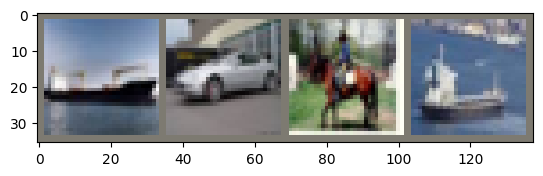

 ship   car horse  ship


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# 定义 CIFAR-10 数据集的类别
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 反标准化函数
def unnormalize(img, mean, std):
    for t, m, s in zip(img, mean, std):
        t.mul_(s).add_(m)
    return img

def imshow(img):
    mean = [0.4914, 0.4822, 0.4465]
    std = [0.2470, 0.2435, 0.2616]
    img = unnormalize(img, mean, std)  # 反标准化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 获取一些随机的训练图像
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 显示图像
imshow(torchvision.utils.make_grid(images))

# 打印标签
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  cat   cat  deer  frog


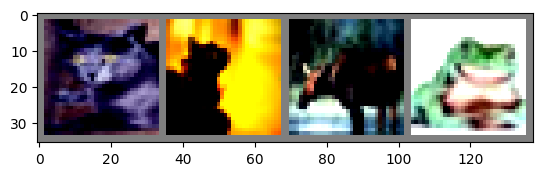

In [14]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def unnormalize(img, mean, std):
    for t, m, s in zip(img, mean, std):
        t.mul_(s).add_(m)
    return img

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
def imshow1(img):
    mean = [0.4914, 0.4822, 0.4465]
    std = [0.2470, 0.2435, 0.2616]
    img = unnormalize(img, mean, std)  # 反标准化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

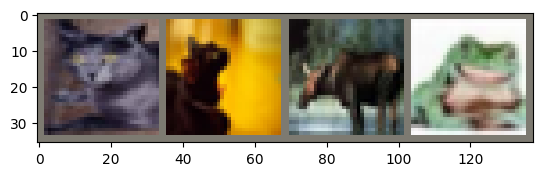

  cat   cat  deer  frog


In [15]:
# show images
imshow1(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Training Your PyTorch Model 训练 PyTorch 模型

让我们将所有部分放在一起，并训练一个模型：

In [16]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

首先，我们需要训练和测试数据集。如果尚未下载，请运行下面的单元格以确保数据集已下载。

In [17]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root=data_path, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=data_path, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


我们将对`DataLoader`的输出进行检查：

 ship truck   dog truck


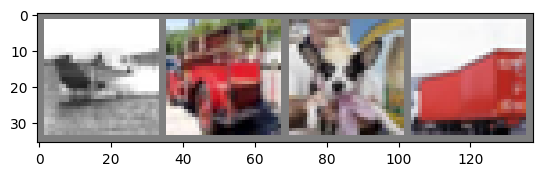

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

这是我们要训练的模型。如果它看起来很熟悉，那是因为它是 `LeNet` 的变体（在本视频前面讨论过），适用于 3 色图像。

In [19]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

我们需要的最后一个部分是损失函数和优化器：

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

正如本视频前面所讨论的，损失函数是衡量模型预测与理想输出的距离的指标。交叉熵损失是像我们这样的分类模型的典型损失函数。

优化器是驱动学习的动力。在这里，我们创建了一个实现随机梯度下降的优化器，这是更简单的优化算法之一。除了算法的参数（例如学习率（ `lr` ）和 `momentum` ）之外，我们还传入`net.parameters()` ，它是模型中所有学习权重的集合 - 这是优化器调整的内容。

最后，所有这些都被组装到训练循环中。继续运行此单元

In [21]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.237
[1,  4000] loss: 1.884
[1,  6000] loss: 1.669
[1,  8000] loss: 1.577
[1, 10000] loss: 1.527
[1, 12000] loss: 1.453
[2,  2000] loss: 1.383
[2,  4000] loss: 1.330
[2,  6000] loss: 1.348
[2,  8000] loss: 1.334
[2, 10000] loss: 1.302
[2, 12000] loss: 1.282
Finished Training


在这里，我们只进行2 个训练周期（epoch）（第 1 行）——即对训练数据集进行两次遍历。每个通道都有一个内部循环，用于迭代训练数据集（第 4 行）。在每次迭代中，提供批量转换后的输入图像及其正确标签。

将梯度归零（第 9 行）是重要的一步。梯度在一批中累积；如果我们不为每个批次重置它们，它们将不断累积，这将提供不正确的梯度值，使学习变得不可能。

在第 12 行中，我们询问模型对此批次的预测。在下面的第 (13) 行中，我们计算损失 - outputs （模型预测）和labels （正确输出）之间的差异

在第14行中，我们执行backward()传递，并计算指导学习的梯度。

在第 15 行中，优化器执行一个学习步骤 - 它使用backward()调用的梯度将学习权重推向它认为会减少损失的方向。

循环的其余部分对epoch数、已完成的训练实例数以及训练循环中收集的损失进行一些简单的报告。

请注意，损失是单调下降的，表明我们的模型正在继续提高其在训练数据集上的性能。

作为最后一步，我们应该检查模型是否确实在进行一般学习，而不是简单地“记住”数据集。这称为过度拟合，通常表明数据集太小（没有足够的示例用于一般学习），或者模型的学习参数多于正确建模数据集所需的参数。

这就是数据集被分为训练和测试子集的原因 - 为了测试模型的通用性，我们要求它对尚未训练的数据进行预测：

In [22]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)  # 返回每个样本的预测结果的最大值和相应的索引
        total += labels.size(0)  # 累加当前批次中样本的数量到 total
        correct += (predicted == labels).sum().item()
        # 比较 predicted 和 labels，得到一个布尔张量，其中预测正确的样本为 True。
        # sum() 计算出预测正确的样本总数。
        # .item() 将这个结果转换为一个 Python 标量，并累加到 correct。

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %
